In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_boston

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df =  load_boston()

In [4]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
dataset = pd.DataFrame(df.data)
dataset.columns =  df.feature_names

In [6]:
#CRIM : per capita rate by town
#ZN :  proportion of residentals land zoned for lots over  sq.ft.
#INDUUS : 

In [6]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
dataset['Price'] = df.target

In [8]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]

## Linear Regression

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
#cv = 5 means data divides in 5 equal parts.

mse = cross_val_score(lin_regressor,X,Y,scoring='neg_mean_squared_error', cv=5)
print(mse)
mean_mse = np.mean(mse)
print(mean_mse)

[-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]
-37.13180746769924


In [27]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(lin_regressor,X,Y,cv=5)

array([30.2041165 , 24.78710797, 30.29277751, 28.06198225, 27.14223347,
       24.82597993, 22.89022279, 18.69757783, 10.31193024, 18.14566984,
       17.86752182, 21.1491762 , 20.8459683 , 19.36822707, 18.86915667,
       19.25183578, 20.66767478, 16.38091184, 16.46601051, 18.40663239,
       11.91936801, 17.23773288, 15.02696904, 13.03628335, 14.98790158,
       12.88641789, 14.85163004, 13.90837396, 18.7281892 , 20.10658207,
       10.57440482, 17.51035593,  7.65043932, 13.77684753, 12.87686366,
       24.14058642, 22.64884172, 23.49030484, 23.23924885, 32.35915874,
       35.14667341, 28.06435066, 25.49870961, 24.79056976, 22.91494706,
       22.45813516, 20.50948005, 17.29554417,  7.92748358, 16.83828313,
       21.07616504, 23.82573259, 27.73607356, 24.22704275, 15.27313138,
       31.06842591, 24.82348544, 33.6151463 , 21.45746348, 20.92775412,
       17.41279275, 17.84574255, 23.49548714, 21.63525387, 21.81058428,
       31.48576117, 26.54699445, 21.29452691, 17.39898513, 20.86

<AxesSubplot:>

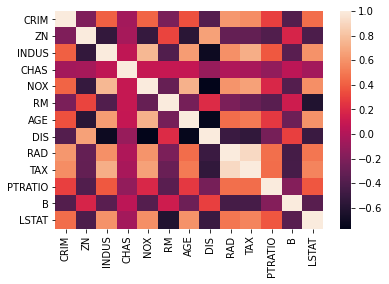

In [20]:
import seaborn as sns 
sns.heatmap(X.corr())

## SGD Regressor 

In [31]:
#stochastic Gradient Descent

from sklearn.linear_model import SGDRegressor

clf_ = SGDRegressor(alpha=.08,l1_ratio=0.3, eta0=0.04, learning_rate='constant' ,
                    loss = 'squared_loss', fit_intercept=True)
mse=cross_val_score(clf_,X,Y,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)

print(mean_mse)

-9.21577697676582e+31


## Ridge Regression

In [35]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

parameters= {'alpha':[0.001,1e-15,1e-10,1e-8,1e-3,1e-2,0.002]}

ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 1e-15, 1e-10, 1e-08, 0.001, 0.01,
                                   0.002]},
             scoring='neg_mean_squared_error')

In [37]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 0.01}
-37.083135026290954


In [38]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

Lasso = Lasso()

parameters= {'alpha':[0.001,1e-15,1e-10,1e-8,1e-3,1e-2,0.002]}

Lasso_regressor = GridSearchCV(Lasso,parameters,scoring='neg_mean_squared_error',cv=5)
Lasso_regressor.fit(X,Y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 1e-15, 1e-10, 1e-08, 0.001, 0.01,
                                   0.002]},
             scoring='neg_mean_squared_error')

In [39]:
print(Lasso_regressor.best_params_)
print(Lasso_regressor.best_score_)

{'alpha': 0.01}
-36.20073515675176


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [44]:
prediction_Laaso = Lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)

ValueError: could not convert string to float: 'prediction_Laaso'

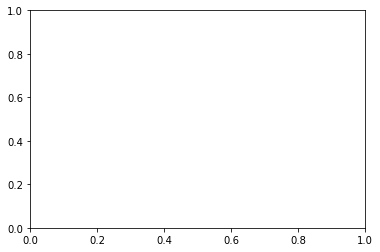

In [45]:
import seaborn as sns
sns.distplot('')